## Telecom Churn Case Study
With 226 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Import Data

In [178]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Importing Pandas and NumPy
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter
from math import sqrt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Machine Learning Libraries
import statsmodels.api as sm

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

#Data Imbalance Treatment Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [180]:
# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None

In [181]:
# Importing all datasets
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### EDA

In [182]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Cleaning


In [183]:
# Function to check column wise null values and % of null values
def null_calc(df):
    null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
    null_perc.columns = ['Column Name', 'Null Values Percentage']
    null_value = pd.DataFrame(df.isnull().sum()).reset_index()
    null_value.columns = ['Column Name', 'Null Values']
    null_df = pd.merge(null_value, null_perc, on='Column Name')
    null_df['Null Values Percentage'] = pd.to_numeric(null_df['Null Values Percentage'], errors='coerce')
    null_df = null_df.loc[null_df['Null Values Percentage'] > 0.00] # Keeping only null columns info
    null_df.sort_values("Null Values", ascending = False, inplace=True, ignore_index=True)
    return null_df

null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,count_rech_2g_6,74846,74.85
1,max_rech_data_6,74846,74.85
2,arpu_3g_6,74846,74.85
3,av_rech_amt_data_6,74846,74.85
4,count_rech_3g_6,74846,74.85
5,night_pck_user_6,74846,74.85
6,arpu_2g_6,74846,74.85
7,fb_user_6,74846,74.85
8,total_rech_data_6,74846,74.85
9,date_of_last_rech_data_6,74846,74.85


###Imputation

In [184]:
# Imputing the data for total_rech_data_6 and av_rech_amt_data_6 as 0
telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)


In [185]:
# Let's check the missing values again
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_6,74846,74.85
1,night_pck_user_6,74846,74.85
2,arpu_3g_6,74846,74.85
3,count_rech_2g_6,74846,74.85
4,arpu_2g_6,74846,74.85
5,count_rech_3g_6,74846,74.85
6,fb_user_6,74846,74.85
7,date_of_last_rech_data_6,74846,74.85
8,night_pck_user_7,74428,74.43
9,date_of_last_rech_data_7,74428,74.43


In [186]:
arpu_2g_6_index = telecom['arpu_2g_6'].isnull()
arpu_3g_6_index = telecom['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom['count_rech_3g_6'].isnull()
fb_user_6_index = telecom['fb_user_6'].isnull()
arpu_2g_7_index = telecom['arpu_2g_7'].isnull()
arpu_3g_7_index = telecom['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom['count_rech_3g_7'].isnull()
fb_user_7_index = telecom['fb_user_7'].isnull()
arpu_2g_8_index = telecom['arpu_2g_8'].isnull()
arpu_3g_8_index = telecom['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom['count_rech_3g_8'].isnull()
fb_user_8_index = telecom['fb_user_8'].isnull()

In [187]:
cols_to_impute = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
for col in cols_to_impute:
    telecom[col].fillna(0, inplace=True)

In [188]:
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_6,74846,74.85
1,date_of_last_rech_data_6,74846,74.85
2,max_rech_data_7,74428,74.43
3,date_of_last_rech_data_7,74428,74.43
4,av_rech_amt_data_9,74077,74.08
5,max_rech_data_9,74077,74.08
6,total_rech_data_9,74077,74.08
7,date_of_last_rech_data_9,74077,74.08
8,max_rech_data_8,73660,73.66
9,date_of_last_rech_data_8,73660,73.66


In [189]:
telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [190]:
telecom[['arpu_6', 'arpu_7', 'arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731
std,328.439770,338.156291,344.474791
min,-2258.709000,-2014.045000,-945.808000
25%,93.411500,86.980500,84.126000
50%,197.704000,191.640000,192.080000
75%,371.060000,365.344500,369.370500
max,27731.088000,35145.834000,33543.624000


In [191]:
telecom = telecom[(telecom['arpu_6'] >= 0) & 
                  (telecom['arpu_7'] >= 0) & 
                  (telecom['arpu_8'] >= 0)]

### High Value Customer

In [192]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

In [193]:
avg_recharge_amount_month_6_7 = telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)



In [194]:
tele_highval_cust = telecom[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

# resetting the index
tele_highval_cust = tele_highval_cust.reset_index(drop=True)

tele_highval_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,

### Customer Churn Calculation

In [195]:
tele_highval_cust['churn'] = tele_highval_cust.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [196]:
tele_highval_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
1,0.00,0.00,0.00,0.00,1
2,34.91,142.18,0.00,0.00,0
3,252.61,1031.53,0.00,0.00,0
4,127.48,127.63,13.93,314.74,0


#remove the data for the 9th month as they will not be used in prediction purpose as these values are not available for the model

In [197]:
cols_with_9 = [col for col in tele_highval_cust.columns if '_9' in col]
cols_with_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [198]:
#dropping the columns with 9th month data
tele_highval_cust.drop(cols_with_9,axis = 1, inplace = True)

In [199]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_8,13740,46.43
1,date_of_last_rech_data_8,13740,46.43
2,max_rech_data_6,12977,43.85
3,date_of_last_rech_data_6,12977,43.85
4,max_rech_data_7,12670,42.82
5,date_of_last_rech_data_7,12670,42.82
6,loc_ic_t2f_mou_8,1088,3.68
7,std_ic_t2m_mou_8,1088,3.68
8,loc_og_t2c_mou_8,1088,3.68
9,std_ic_t2t_mou_8,1088,3.68


In [200]:
#dropping the date_of_last_rech_data_X columns
tele_highval_cust.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis = 1, inplace = True)
print("Number of Columns remaining:",len(tele_highval_cust.columns))

Number of Columns remaining: 172


In [201]:
# checking the data distribution of these 3 columns : 
tele_highval_cust[['max_rech_data_6', 'max_rech_data_7' , 'max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16614.000000,16921.000000,15851.000000
mean,139.744192,140.500561,136.448300
std,118.743427,120.291309,119.687372
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


In [202]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    tele_highval_cust[col].fillna(0, inplace=True)

In [203]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,loc_og_t2m_mou_8,1088,3.68
1,std_ic_t2m_mou_8,1088,3.68
2,std_ic_t2t_mou_8,1088,3.68
3,std_og_mou_8,1088,3.68
4,loc_ic_mou_8,1088,3.68
5,loc_og_t2f_mou_8,1088,3.68
6,loc_ic_t2f_mou_8,1088,3.68
7,loc_og_t2c_mou_8,1088,3.68
8,loc_ic_t2m_mou_8,1088,3.68
9,loc_og_mou_8,1088,3.68


In [204]:
# Delete all the date columns
tele_highval_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                        'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis = 1, inplace = True)
tele_highval_cust.shape

(29591, 166)

In [205]:
# Let's store the null columns as a list first
cols_null = tele_highval_cust.columns[tele_highval_cust.isna().any()].tolist()
print(cols_null)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_m

In [206]:
# fill null values with 0
for col in cols_null:
    tele_highval_cust[col].fillna(0, inplace=True)   

In [207]:
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage


##Drop Unnecessary Columns

In [208]:
columns_with_0_variance = tele_highval_cust.var() == 0
print("Total columns with ZERO variance are : ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

Total columns with ZERO variance are :  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [209]:
# We will drop these columns where variance is 0
tele_highval_cust.drop(column_name_with_0_variance,axis=1, inplace = True)
tele_highval_cust.shape

(29591, 156)

In [210]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'mobile_number']

tele_highval_cust.drop(individual_cols, axis = 1, inplace = True)

tele_highval_cust.shape

(29591, 104)

#Categorical Columns treatment

In [211]:
def frequency_info(df):
    df_result = pd.DataFrame(columns=["columns","values","unique_values"])
    
    df_temp=pd.DataFrame()
    for value in df.columns:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("unique_values", ascending =True, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [212]:
frequency_info(tele_highval_cust)

,values,unique_values
columns,,
churn,"[1, 0]",2
night_pck_user_6,"[0.0, 1.0]",2
night_pck_user_8,"[0.0, 1.0]",2
night_pck_user_7,"[0.0, 1.0]",2
fb_user_6,"[1.0, 0.0]",2
fb_user_7,"[1.0, 0.0]",2
fb_user_8,"[1.0, 0.0]",2
monthly_2g_6,"[0, 2, 1, 3, 4]",5
monthly_2g_8,"[0, 1, 2, 5, 3, 4]",6


In [213]:
# We will convert the columns which have 2 values to an ordered categorical column and convert it to int type
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tele_highval_cust[category_list] = tele_highval_cust[category_list].astype(int)

tele_highval_cust[category_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29591 non-null  int64
 1   night_pck_user_7  29591 non-null  int64
 2   night_pck_user_8  29591 non-null  int64
 3   fb_user_6         29591 non-null  int64
 4   fb_user_7         29591 non-null  int64
 5   fb_user_8         29591 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


## EDA

In [214]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 
            'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
num_cols = tele_highval_cust.dtypes[(tele_highval_cust.dtypes == "float64") | (tele_highval_cust.dtypes == "int64") | (tele_highval_cust.dtypes == "int32")].index.to_list()
for col in cat_cols:
    num_cols.remove(col) 
num_cols.remove('churn')

In [215]:
print("CATEGORICAL FEATURES : \n {} \n\n".format(cat_cols))
print("NUMERICAL FEATURES : \n {} \n\n".format(num_cols))

CATEGORICAL FEATURES : 
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'] 


NUMERICAL FEATURES : 
 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_

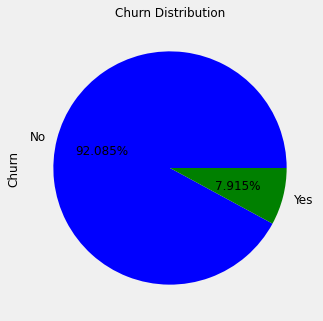

In [216]:
# Checking the customer churn distribution
ax = (tele_highval_cust['churn'].value_counts()*100.0 /len(tele_highval_cust)).plot.pie(autopct='%.3f%%', 
                                                                                        labels = ['No', 'Yes'],
                                                                                        colors =['b','g'],
                                                                                        figsize =(5,5), 
                                                                                        fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

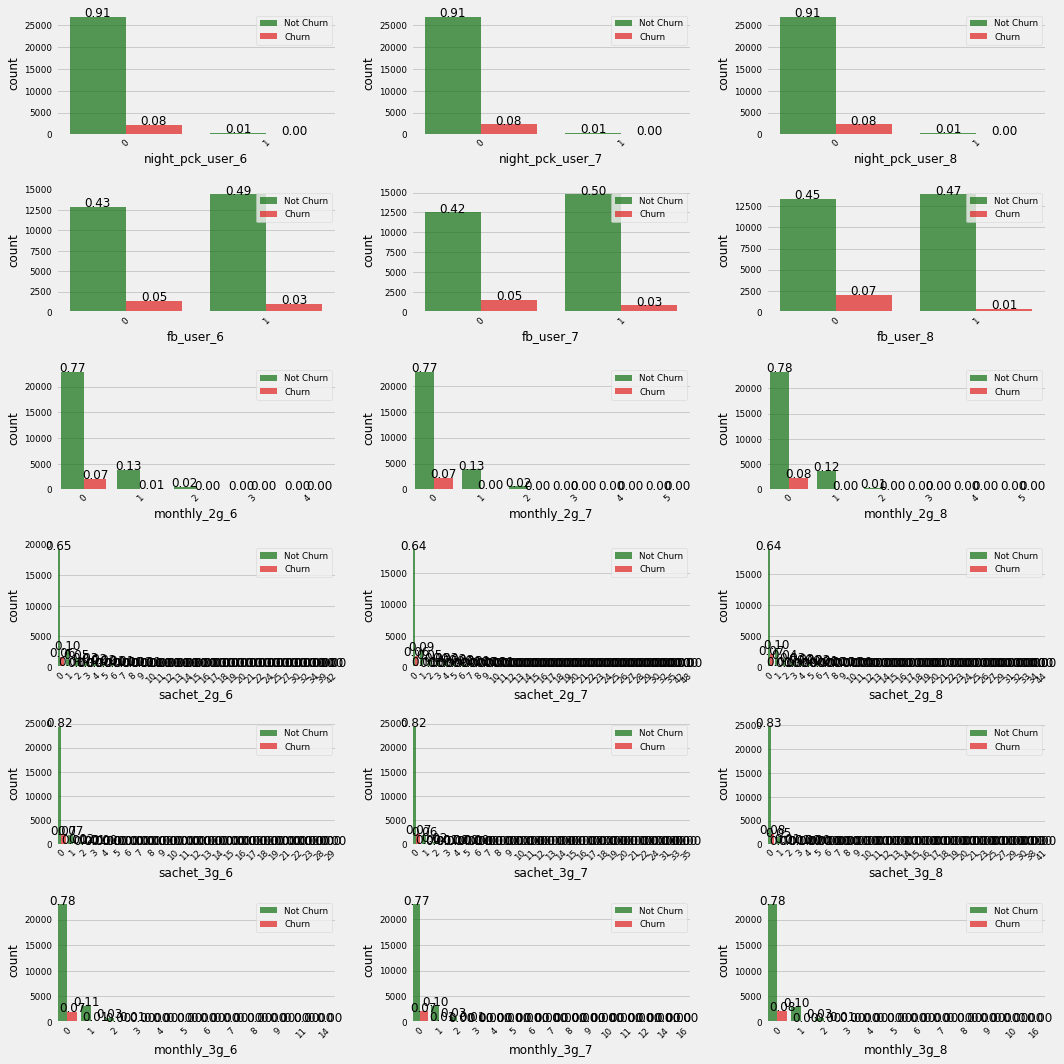

In [217]:
#Plotting a countplot with all the variables
fig, axes = plt.subplots(round(len(cat_cols) / 3), 3, figsize=(15, 15))

total = float(len(tele_highval_cust))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_cols[i], alpha=0.7, data=tele_highval_cust, hue=tele_highval_cust['churn'],palette=['g','r'], ax=ax)
        # Renaming the Legends from 0/1 to Not Churn/Churn
        ax.legend(['Not Churn','Churn'],loc="upper right")
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(cat_cols[i],fontsize=12)
        ax.set_ylabel('count',fontsize=12)
        # adding annotations
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/total),
                    ha="center",
                    fontsize=12)
        
fig.tight_layout()

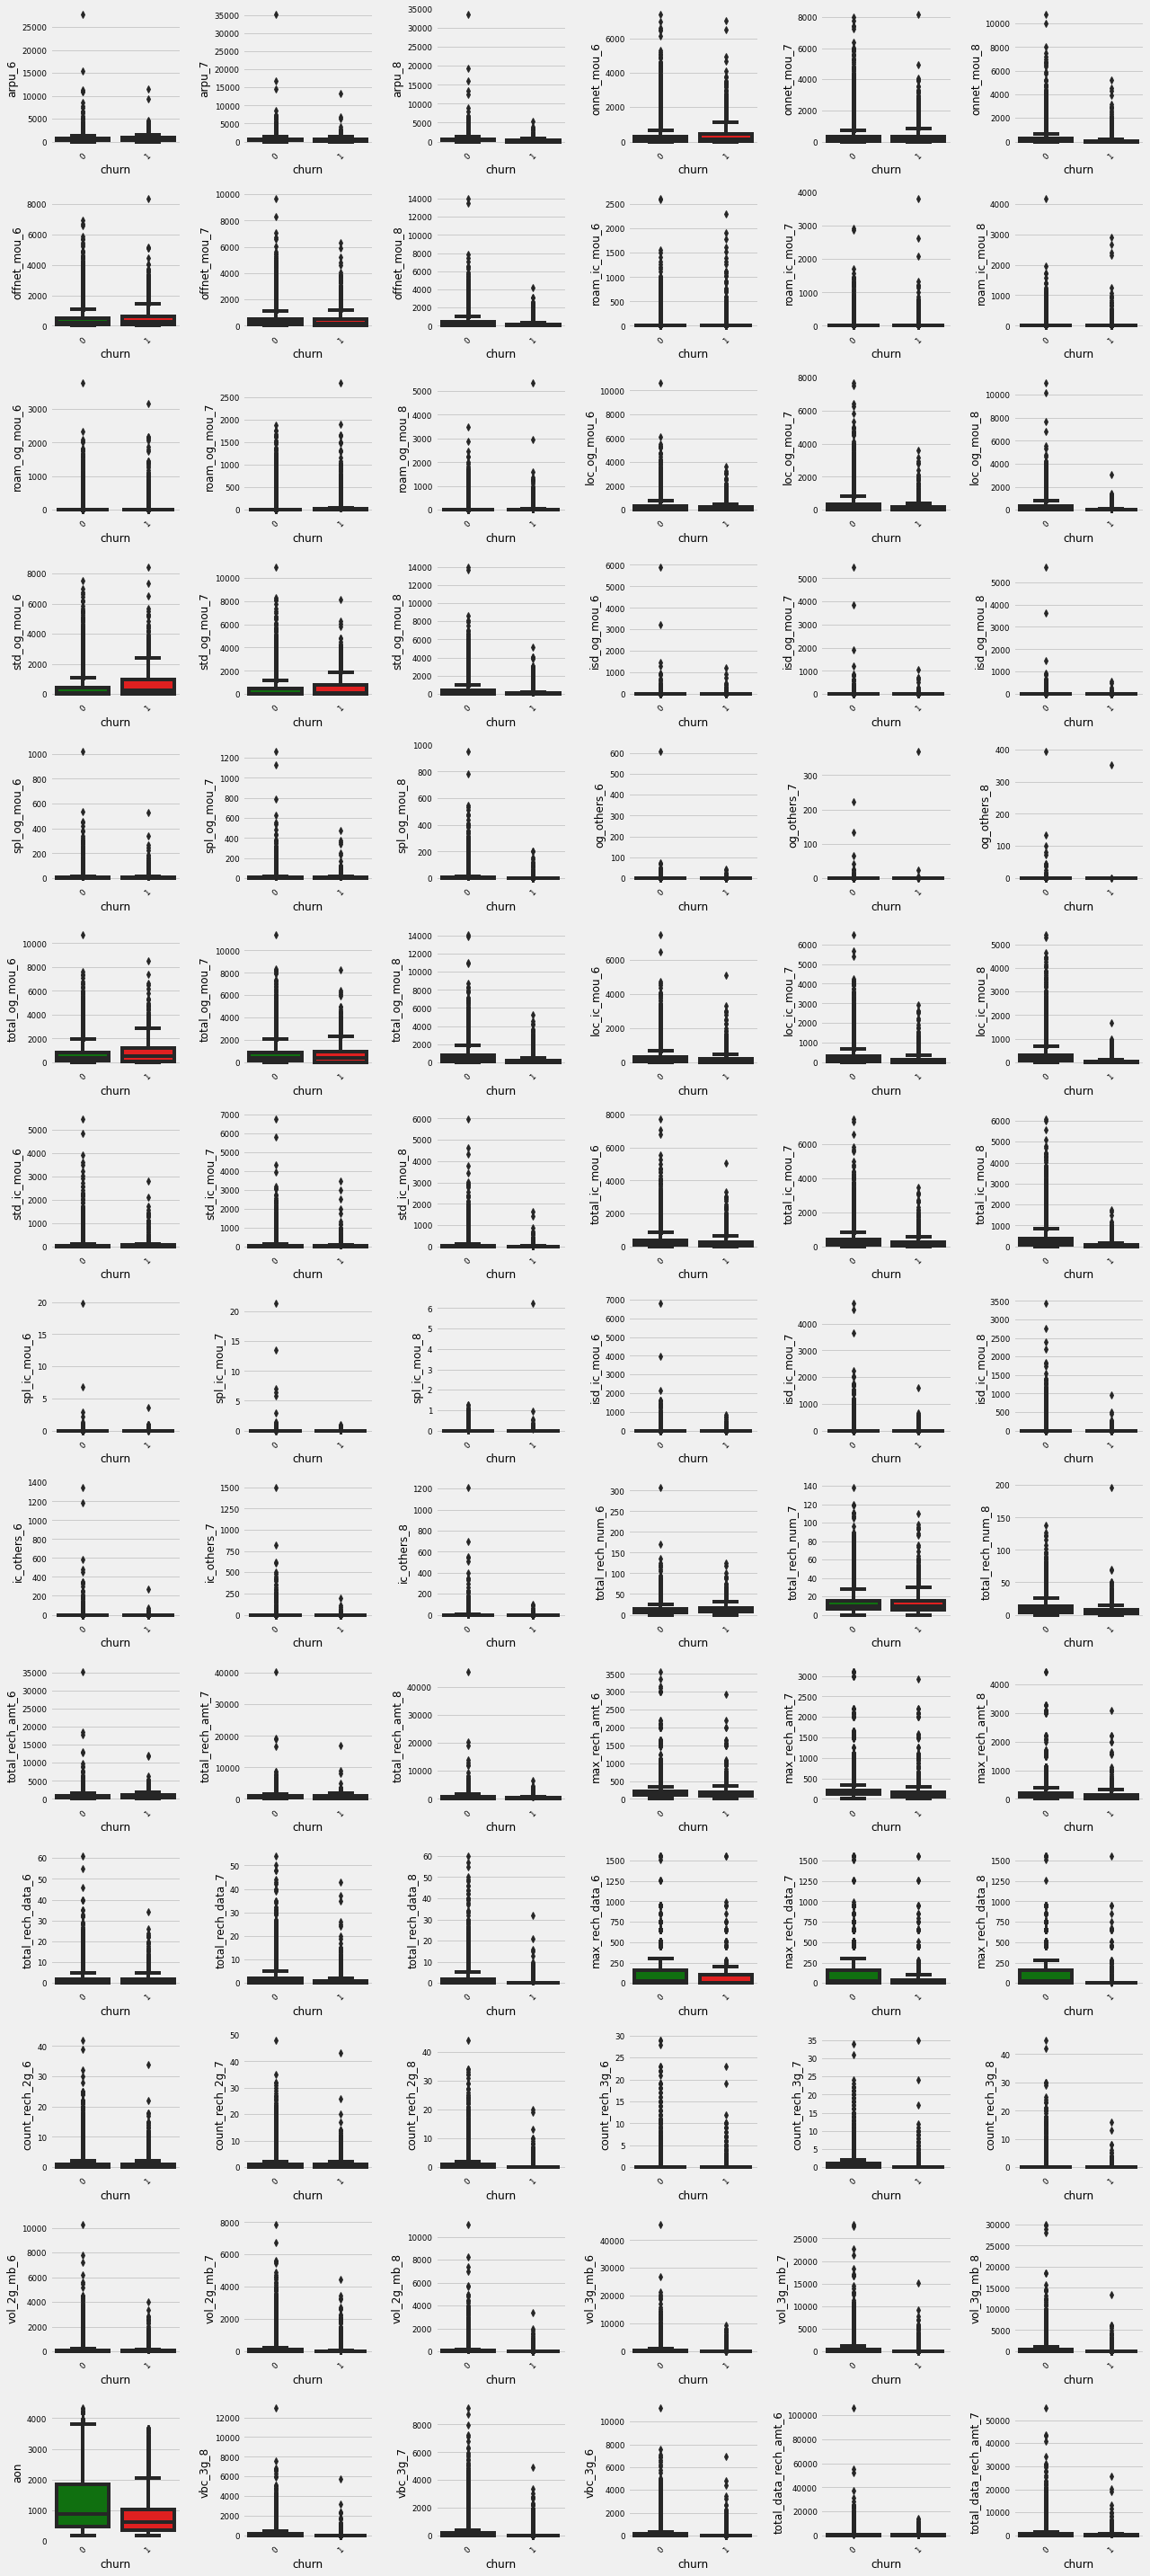

In [218]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

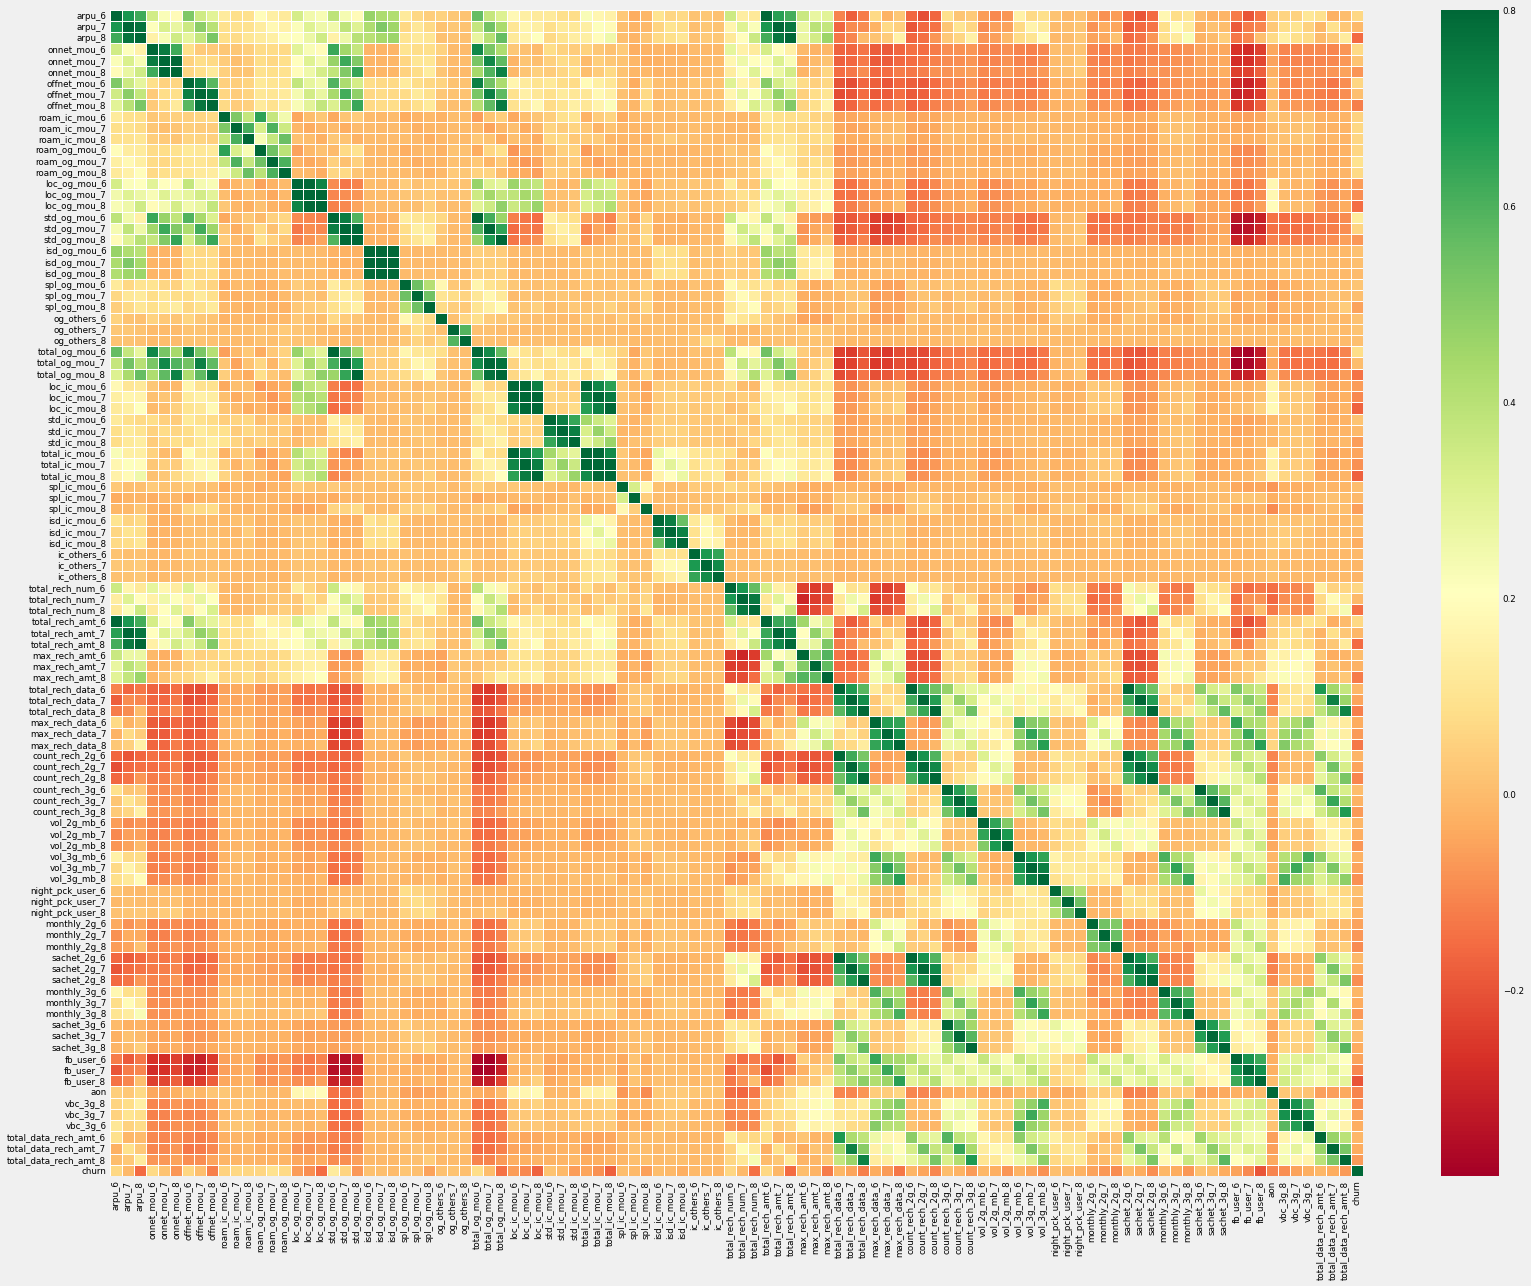

In [219]:
# Checking the correlation matrix
corrmat = tele_highval_cust.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrmat, vmax=.8,cmap="RdYlGn",linewidth =1)
plt.show()

In [220]:
# Checking the top correlated features
corr_matrix = tele_highval_cust.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))


List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


## Data Preparation

In [221]:
#Find skewed numerical features
skew_features = tele_highval_cust[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.2 ".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 85 numerical features with Skew > 0.2 


og_others_7              111.136693
og_others_6              109.666418
og_others_8               99.486834
isd_og_mou_8              88.957842
isd_og_mou_6              87.011130
isd_og_mou_7              83.406637
spl_ic_mou_7              72.455557
ic_others_6               58.476965
ic_others_8               46.938700
ic_others_7               44.139529
spl_ic_mou_6              41.540185
isd_ic_mou_6              34.696418
isd_ic_mou_7              24.405269
total_data_rech_amt_6     22.639450
spl_og_mou_7              19.449973
total_data_rech_amt_8     19.062494
roam_ic_mou_8             18.590514
total_rech_amt_8          18.073139
arpu_7                    17.681620
isd_ic_mou_8              17.417915
roam_ic_mou_7             17.264460
total_rech_amt_7          16.200891
arpu_8                    15.417555
spl_og_mou_6              15.414604
roam_og_mou_8             14.479325
spl_og_mou_8              14.429340
std_ic_mou_7              13.514776
total_rech_amt_6          13

In [222]:
for i in skew_index:
    tele_highval_cust[i] = boxcox1p(tele_highval_cust[i], boxcox_normmax(tele_highval_cust[i] + 1))

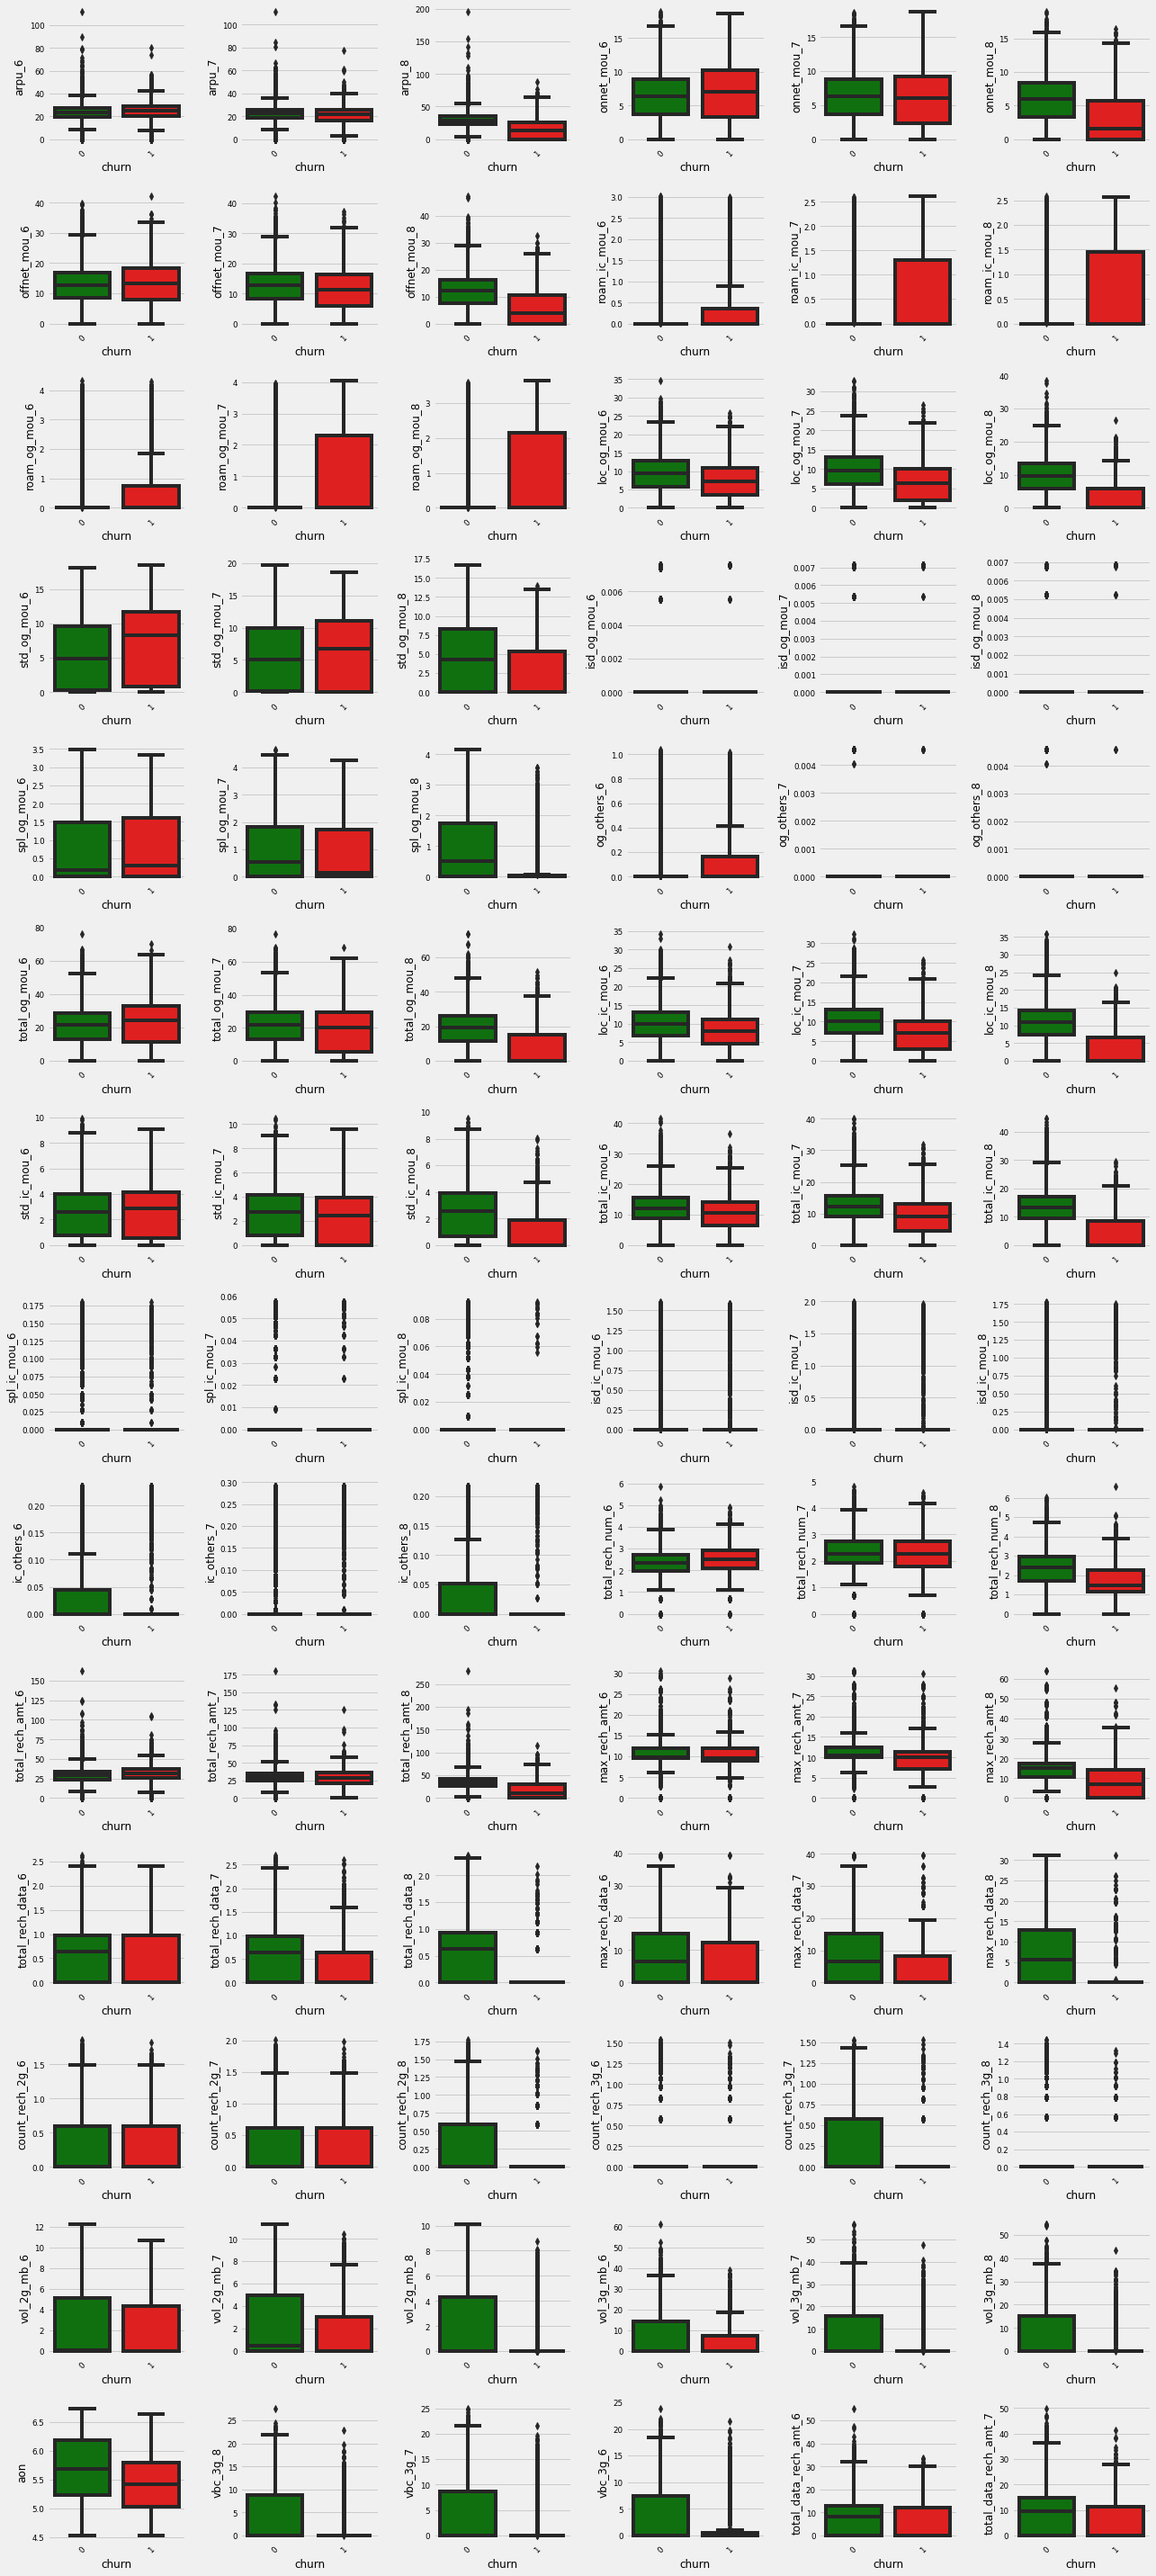

In [223]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

In [224]:
tele_highval_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'churn'],
      dtype='object', length=104)

In [225]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [226]:
# Creating features for good phase and action phase column : 

cols = ["arpu","onnet_mou","offnet_mou","roam_ic_mou","roam_og_mou","loc_og_mou","std_og_mou",
        "isd_og_mou","spl_og_mou","og_others","total_og_mou","loc_ic_mou","std_ic_mou",
        "spl_ic_mou","isd_ic_mou","ic_others","total_ic_mou","total_rech_num","total_rech_amt",
        "max_rech_amt","total_rech_data","max_rech_data","count_rech_2g","count_rech_3g",
        "vol_2g_mb","vol_3g_mb","monthly_2g","sachet_2g","sachet_3g",
        "monthly_3g","vbc_3g","total_data_rech_amt"]

for col in cols : 
    tele_highval_cust = derive_good_action_phase(tele_highval_cust, col)
    print (col)

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_ic_mou
total_rech_num
total_rech_amt
max_rech_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
sachet_3g
monthly_3g
vbc_3g
total_data_rech_amt


In [227]:
#Checking the dataframe after conversion
tele_highval_cust.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,5.742220,1,16.081834,20.713068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.443393,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.521209,1.496747,1.148225,22.375679,24.730620,13.203150,19.370520,0.641770,0.626475,18.613789,15.774688,0.000000,0.000000,0.574579,0.561647,2.333617,1.942370,9.637338,9.394443,0.0,0,0.0,0,0.0,0,1.0,1,3.589683,4.931148,11.102776,9.786429
1,0,0,0,0,0,0,5.612020,1,32.670626,70.113924,5.555118,5.302855,16.895627,14.349754,1.951453,1.958365,2.245214,2.439742,14.349623,12.252005,5.829424,5.579033,0.003566,0.006833,0.706747,1.722190,0.0,0.0,24.123337,18.781593,14.011505,11.903425,5.692895,5.581258,0.058685,0.0,1.152614,1.535088,0.262379,0.216533,18.063520,17.923673,1.787956,2.261986,39.820232,87.601955,21.848753,41.992283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0,0.0,0,4.012347,6.244273,0.000000,0.000000
2,0,0,0,0,1,1,4.945874,0,21.795480,16.778962,9.568583,4.644254,8.971096,10.516335,0.000000,0.000000,0.000000,0.000000,12.773658,7.419760,7.176627,5.952949,0.000000,0.000000,0.000000,2.005312,0.0,0.0,22.699951,14.099009,6.561508,4.292310,2.558616,0.562976,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.697438,4.615603,3.031241,3.023034,28.318422,17.097225,10.075521,7.167745,0.489901,1.136426,7.527992,5.616541,0.447455,1.018575,0.000000,0.000000,3.414412,0.029567,9.390663,3.670656,0.5,0,0.5,3,0.0,0,0.0,0,10.873602,4.256728,6.256556,9.237327
3,0,0,0,0,0,0,5.536787,0,24.097628,34.307601,6.938000,6.164247,19.875306,20.768194,0.000000,0.000000,0.000000,0.000000,8.394549,9.688926,11.403355,10.130424,0.000000,0.000000,0.000000,0.000000,0.0,0.0,29.952809,28.845065,8.950542,11.201336,4.430578,4.871293,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.563293,14.914902,3.201236,3.817431,31.090398,40.969596,7.152169,9.237294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000,0.000000
4,0,0,0,0,1,1,5.413330,0,12.945044,26.644539,5.338161,4.574672,8.963148,12.210779,0.000000,0.000000,0.000000,0.000000,9.429600,10.913341,1.818925,4.553437,0.002682,0.000000,0.047143,2.338095,0

In [228]:
#Checking the new shape of the dataframe
tele_highval_cust.shape

(29591, 72)

### Model Creation

In [229]:
#Target variable
X = tele_highval_cust.drop('churn', axis = 1)
y = tele_highval_cust[['churn']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [230]:
# Storing the non binary column names as a list for performaing StandardScaler
feature_col =[]
data_col = tele_highval_cust.columns.to_list()

for col in data_col:
    if tele_highval_cust[col].nunique() > 2:
        feature_col.append(col)
        
feature_col

['aon',
 'arpu_good_phase',
 'arpu_action_phase',
 'onnet_mou_good_phase',
 'onnet_mou_action_phase',
 'offnet_mou_good_phase',
 'offnet_mou_action_phase',
 'roam_ic_mou_good_phase',
 'roam_ic_mou_action_phase',
 'roam_og_mou_good_phase',
 'roam_og_mou_action_phase',
 'loc_og_mou_good_phase',
 'loc_og_mou_action_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'isd_og_mou_good_phase',
 'isd_og_mou_action_phase',
 'spl_og_mou_good_phase',
 'spl_og_mou_action_phase',
 'og_others_good_phase',
 'og_others_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_good_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_good_phase',
 'std_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_good_phase',
 'isd_ic_mou_action_phase',
 'ic_others_good_phase',
 'ic_others_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'total_rech_num_good_phase',
 'total_rech_num_action_phase',
 'total_rech_amt_g

In [231]:
#Using StandardScaler for Scaling the X_train and X_test
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train[feature_col])

X_train[feature_col] = scaler.fit_transform(X_train[feature_col])
X_test[feature_col] = scaler.transform(X_test[feature_col])

# Checking the scaled dataframe
X_train.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
28117,0,0,0,1,1,1,-0.528861,-0.467471,-0.319068,-1.051506,-1.047610,-0.597360,-0.154047,-0.54328,-0.44171,-0.545471,-0.440755,-0.158734,0.156611,-1.208238,-1.102076,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.851481,-0.455758,1.240561,1.251130,0.695002,1.699288,-0.513234,-0.298957,-0.533818,-0.472588,1.257788,0.286440,1.160944,1.363811,-1.008128,-0.681013,-0.475504,0.096528,0.946217,0.810640,0.097638,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.410550,1.382603,1.002698,1.242866,1.292581,1.661691,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.183250,1.340651,1.250606,1.918477,2.159467,0.499513,0.591775
1574,0,0,0,1,1,1,0.233154,-0.818194,-0.430065,-1.347858,-1.281932,-0.214108,-0.501223,-0.54328,-0.44171,-0.545471,-0.440755,-0.050150,-0.711955,-1.099442,-0.056580,-0.337428,-0.259076,2.115867,1.540091,1.481465,-0.076965,-0.574379,-0.729649,0.049179,-0.381936,-0.972204,2.162939,1.887150,-0.298957,-0.533818,0.326037,-0.454012,2.202034,-0.185899,0.931746,0.318017,1.018777,-0.837504,-0.379617,-0.805709,-0.279132,0.751704,1.969936,0.278093,0.702630,1.110814,2.102974,-0.612612,1.382603,1.927404,1.858318,-0.732163,0.550974,-0.462916,-0.380187,0.562942,2.320598,-0.228656,0.749574,-0.395068,-0.343965,-0.695678,0.934885,0.346833,1.708898
22863,0,0,0,1,1,1,0.548641,-0.452190,-0.813731,-0.237607,-0.641922,-0.686547,-0.581803,-0.54328,-0.44171,-0.545471,-0.440755,-0.019972,-0.484903,-1.208238,-1.102076,-0.337428,-0.259076,1.237381,1.920525,-0.503468,-0.076965,-0.709895,-0.718901,0.224608,-0.369268,-1.430475,-1.245269,-0.513234,-0.298957,-0.533818,-0.472588,0.489277,-0.535004,-0.020551,-0.567019,0.809798,0.461813,-0.448269,-0.543246,-1.179273,-0.107703,1.260013,1.368754,-0.019088,-0.015079,1.213264,1.098464,1.410550,2.163059,0.213232,0.631840,1.036791,0.657528,-0.462916,-0.380187,0.770930,0.365338,0.816389,1.682398,-0.395068,-0.343965,0.956951,1.088837,0.666339,0.805607
8840,0,0,0,1,1,1,-1.843725,0.146634,-0.187263,1.042633,0.866636,-0.291516,0.025460,-0.54328,-0.44171,-0.545471,-0.440755,1.241791,1.060244,-0.721129,-0.250553,-0.337428,-0.259076,0.412287,-0.864140,-0.503468,-0.076965,0.367796,0.333271,1.289656,1.402730,0.857997,1.343514,-0.513234,-0.298957,1.234536,-0.472588,-0.627970,-0.535004,1.155576,1.355781,-0.468639,0.077432,0.088736,-0.305332,-0.043037,0.054252,0.097638,0.195002,1.102007,1.097937,0.470752,0.527443,-0.612612,-0.513008,0.

In [232]:
# Checking the scaled dataframe
X_test.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
3945,0,0,0,0,0,0,-0.126491,0.031503,0.198380,1.404110,1.512551,-0.850806,-0.266763,-0.543280,-0.441710,-0.545471,-0.440755,-0.976885,-1.008852,1.219854,1.393512,-0.337428,-0.259076,0.409806,-0.313011,-0.503468,-0.076965,0.669429,0.901960,-0.202180,-0.587967,-0.801104,-0.173399,0.607306,3.806894,-0.533818,-0.472588,1.038612,0.827454,-0.429694,-0.702240,0.960151,1.018777,-0.107656,0.284884,-1.179273,0.054252,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
18981,0,0,0,0,0,0,-0.766292,0.401345,1.028519,0.505724,1.320249,1.138970,1.734024,0.780640,-0.441710,1.001603,-0.440755,-0.213913,0.567866,1.170303,1.700215,-0.337428,-0.259076,0.373077,0.982632,-0.503468,-0.076965,0.889723,1.672906,-0.658355,-0.104345,0.398294,0.671549,-0.513234,-0.298957,1.084576,2.533083,-0.627970,2.211171,-0.604061,0.286324,0.182899,0.766101,0.421230,0.925941,-0.434280,0.158762,-1.070667,0.195002,-1.071646,-0.547319,-0.839221,0.527443,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.025714,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.598681
24100,0,0,0,0,0,0,0.807275,-1.233034,0.217727,0.152057,0.460959,0.132609,0.310991,1.408633,0.802457,1.958513,1.623131,-0.330329,0.023565,0.668732,0.845012,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.086910,0.205292,-0.293059,-0.233109,1.724038,1.460414,-0.513234,-0.298957,-0.533818,-0.472588,-0.627970,-0.535004,0.334238,0.186344,-2.570061,-0.959753,-1.156438,-1.117930,-0.583246,-0.204529,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
25300,0,0,0,1,1,1,0.671698,1.238497,1.044121,0.037504,0.316263,0.658094,0.794836,2.537277,2.386037,2.070175,1.449200,1.125470,1.274169,-1.061022,-0.616228,-0.337428,-0.259076,1.516537,-0.864140,-0.503468,-0.076965,0.269470,0.503288,2.650356,2.356318,0.555867,0.415598,-0.513234,1.399243,0.982196,1.519649,2.273134,2.207692,2.517667,2.190729,-0.584631,-0.449552,1.233224,0.925941,0.946217,0.810640,0.395985,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.847055

# Data Imbalance with SMOTE

In [233]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote - SMOTEENN
sampling = SMOTEENN(random_state = 0)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

In [234]:
# RandomOverSampler
X_r_over_sampled, y_r_over_sampled = RandomOverSampler(random_state = 100).fit_resample(X_train, y_train)

X_r_over_sampled = pd.DataFrame(data = X_r_over_sampled)
y_r_over_sampled = pd.DataFrame(data = y_r_over_sampled)

In [235]:
X_r_under_sampled, y_r_under_sampled = RandomUnderSampler(random_state = 100).fit_resample(X_train, y_train)

X_r_under_sampled = pd.DataFrame(data = X_r_under_sampled)
y_r_under_sampled = pd.DataFrame(data = y_r_under_sampled)

In [236]:
X_smote_samples, y_smote_samples = SMOTE(n_jobs = -1, random_state = 100).fit_resample(X_train, y_train)

X_smote_samples = pd.DataFrame(data = X_smote_samples)
y_smote_samples = pd.DataFrame(data = y_smote_samples)

##Model Building

In [266]:
# function for running RFE on Logistic Regression Model
def run_rfe_on_logistic(X_train, y_train, no_of_features):
    logreg = LogisticRegression()
    rfe = RFE(logreg)             # running RFE with the given number of variables as output
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    return col

In [238]:
# Build the logistic model with StatsModels 
def build_logistic_model(X_train_logistic,Y_train_logistic):
    X_train_sm = sm.add_constant(X_train_logistic)
    logistic_model = sm.GLM(Y_train_logistic,X_train_sm, family = sm.families.Binomial())
    logistic_model = logistic_model.fit()
    return logistic_model, X_train_sm

In [239]:
# Function for plotting precision, recall , accuracy curve 
def predict_train_using_logistic_model(logistic_model, X_train_sm, y_train):
    y_train_pred = logistic_model.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    y_train_actual = y_train.values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Churn_Actual':y_train_actual, 'Churn_pred_prob':y_train_pred})
    
    # create metrics DF for different cut off
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final['Churn_pred_prob'].map(lambda x: 1 if x > i else 0)
        
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    metrics_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec','rec'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final['Churn_Actual'], y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        prec = cm1[1,1] / (cm1[1,1] + cm1[0,1])
        rec = cm1[1,1] / (cm1[1,0] + cm1[1,1])
        metrics_df.loc[i] =[ i ,accuracy,sensi,speci, prec, rec]
        
    plt.figure(figsize=(15,7))
    
    # plotting the graphs 
    plt.subplot(1,2,1)
    sns.lineplot(data=metrics_df)
    #cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','prec','rec'])
    plt.xticks(np.arange(0,1,step=0.05),size=8)
    plt.yticks(size=12)
    plt.legend(loc='lower right')
    plt.title('Metrics plot')
    plt.xlabel('Probability of churn')
    plt.ylabel('Metrics values')
 
    # AUC-ROC Curve 
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn_Actual'], 
                                             y_train_pred_final['Churn_pred_prob'],
                                             drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_train_pred_final['Churn_Actual'],
                                      y_train_pred_final['Churn_pred_prob'] )
    plt.subplot(1,2,2)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return y_train_pred_final

In [259]:
# Function to generate model evaluation metrics and graphs
def classification_algo_metrics(y_actual, y_pred):
    print("Classification report:\n", classification_report(y_actual,y_pred))
    
    accuracy = round(accuracy_score(y_actual, y_pred),4)
    precision = round(precision_score(y_actual, y_pred),4)
    recall = round(recall_score(y_actual, y_pred),4)
    f1 = round(f1_score(y_actual, y_pred),4)
    conf_matrix = confusion_matrix(y_actual, y_pred) # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred),4) # roc_auc_score
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", model_roc_auc,"\n")
     
    # Confusion Matrix
    cm = metrics.confusion_matrix( y_actual, y_pred )
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="PuBu",
    xticklabels = ["Not Churned", "Churned"] ,
    yticklabels = ["Not Churned", "Churned"] )
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()  
    return (accuracy, precision, recall, f1, model_roc_auc)

In [241]:
def predict_test_using_logistic_model(logistic_model, X_test, y_test, cutoff):
    X_test_sm = sm.add_constant(X_test) # adding contant value 
    y_test_pred = logistic_model.predict(X_test_sm) # Predicting on the test data set
    y_test_pred = y_test_pred.values.reshape(-1)
    y_test_pred = pd.DataFrame(y_test_pred) # Converting y_pred to a dataframe which is an array
    y_test_df = pd.DataFrame(y_test) # Converting y_test to dataframe
    
    # Removing index for both dataframes to append them side by side 
    y_test_pred.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)

    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_Prob'})
    # Making prediction of churn or not based on cutoff selected
    y_pred_final['final_predicted'] = y_pred_final.Churned_Prob.map(lambda x: 1 if x > cutoff else 0)
    return y_pred_final

In [242]:
# create an Empty DataFrame to store results
results = pd.DataFrame()

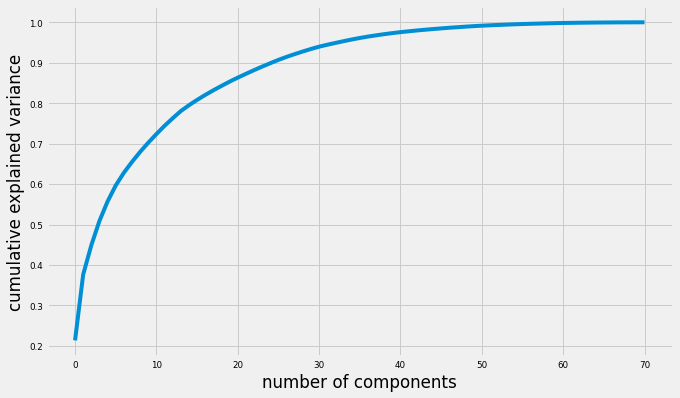

In [243]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (10,6))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print("Shape of X train PCA : ", X_train_pca.shape)
    print("Shape of Y train PCA : ", y_train.shape)
    print("Shape of X test PCA : ", X_test_pca.shape)
    print("Shape of Y test PCA : ", y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (10,8))
    sns.heatmap(corrmat, annot = False,cmap="RdYlGn",linewidth =1)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    
    return X_train_pca, X_test_pca

perform_PCA(X_r_over_sampled)

Shape of X train PCA :  (38134, 25)
Shape of Y train PCA :  (38134, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


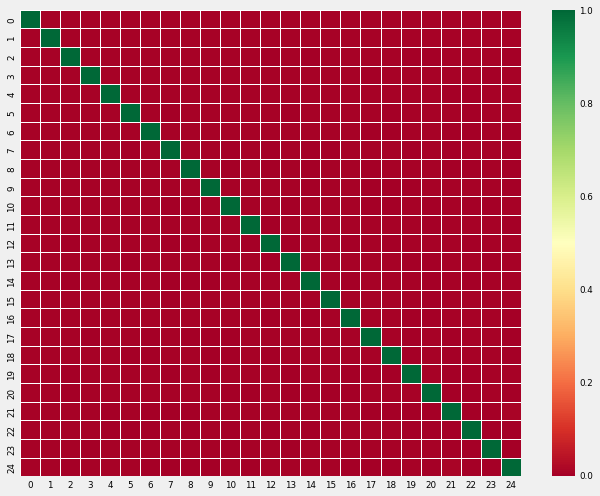

max corr: 0.004480854161507192 , min corr:  -0.004189746589402384


In [244]:
X_train_pca_ro, X_test_pca_ro = perform_incremental_PCA(X_r_over_sampled, y_r_over_sampled, 25)

In [245]:
logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced = build_logistic_model(X_train_pca_ro, y_r_over_sampled.values.ravel())
logistic_model_pca_r_over_balanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14971.
Date:                Tue, 18 Apr 2023   Deviance:                       29943.
Time:                        21:23:08   Pearson chi2:                 4.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4518
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.016      2.840      0.005       0.014       0.075
0             -0.3362      0.004    -78.341      0.000      -0.345      -0.328
1             -0.4622      0.005    -84.083      0.000      -0.473      -0.451
2              0.1707      0.007     26.143      0.000       0.158       0.183
3              0.1031      0.007     14.060      0.000       0.089       0.118
4              0.4777      0.009     50.424      0.000       0.459       0.496
5             -0.0237      0.009     -2.730      0.006      -0.041      -0.007
6              0.2202      0.010     21.949      0.000       0.200       0.240
7             -0.0558      0.011     -5.039      0.000      -0.078      -0.034
8             -0.1331      0.012    -11.353      0.000      -0.156      -0.110
9             -0.1569      0.012    -13.328      0.000      -0.180      -0.134
10            -0.0321      0.012     -2.610      0.009      -0.056      -0.008
11            -0.3636      0.013    -27.755      0.000      -0.389      -0.338
12            -0.0237      0.013     -1.779      0.075      -0.050       0.002
13            -0.1003      0.014     -7.234      0.000      -0.127      -0.073
14             0.0007      0.015      0.048      0.962      -0.029       0.030
15             0.0008      0.015      0.053      0.958      -0.029       0.030
16            -0.0669      0.016     -4.096      0.000      -0.099      -0.035
17             0.0301      0.017      1.766      0.077      -0.003       0.063
18             0.1186      0.018      6.755      0.000       0.084       0.153
19             0.0380      0.018      2.063      0.039       0.002       0.074
20            -0.0749      0.018     -4.066      0.000      -0.111      -0.039
21            -0.1139      0.019     -5.947      0.000      -0.151      -0.076
22            -0.0927      0.019     -4.869      0.000      -0.130      -0.055
23            -0.3198      0.023    -13.747      0.000      -0.365      -0.274
24             0.0291      0.021      1.371      0.170      -0.012       0.071
==============================================================================
"""

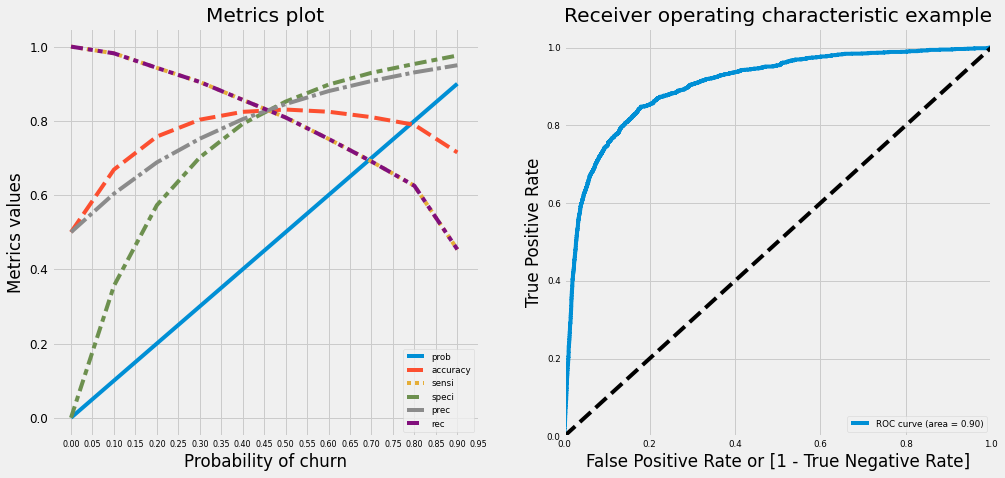

In [246]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced, y_r_over_sampled)

In [247]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns of all other cutoff

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     19067
           1       0.83      0.84      0.83     19067

    accuracy                           0.83     38134
   macro avg       0.83      0.83      0.83     38134
weighted avg       0.83      0.83      0.83     38134

Accuracy Score   :  0.833
Precision Score  :  0.8274
Recall Score     :  0.8416
F1 Score         :  0.8345
Area under curve :  0.833 



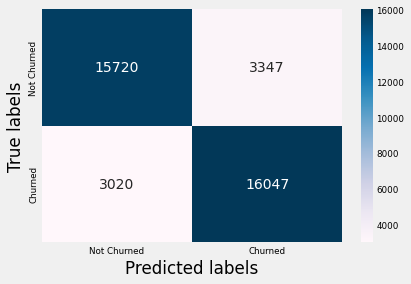

(0.833, 0.8274, 0.8416, 0.8345, 0.833)

In [261]:
print("Evaluation on training data set: \n")
classification_algo_metrics(y_r_over_sampled, y_train_pred_final['final_predicted_1'])

In [249]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_r_over_balanced, X_test_pca_ro, y_test, cutoff=0.45) 
y_test_pred_final.head()

,churn,Churned_Prob,final_predicted
0,0,0.091873,0
1,0,0.096463,0
2,0,0.274017,0
3,0,0.024216,0
4,0,0.277401,0
